# Aggiungi il p-value al nuovo fit dell' esercizio 3, attenzione che il p value del sns.jointplot si riferisce al primo grafico (quello rosso) non a nuovo fatto con gli errori, devi capire come si fa a sputare chi-square goodness of fit test python con gli errori 


1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

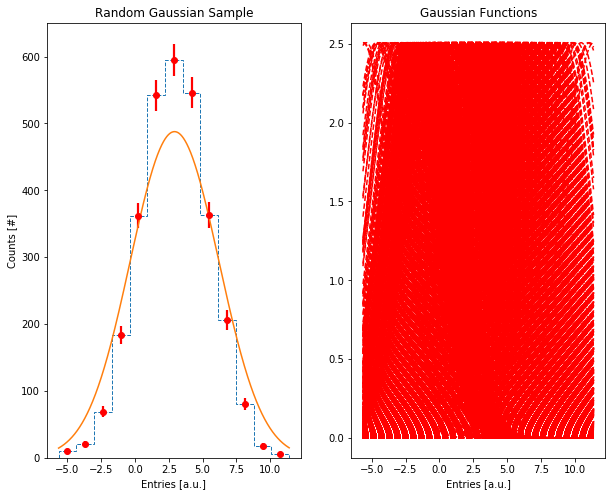

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
import scipy as sc

N=3000
sigma=2.5
mu=3
np.random.seed(415)
array0= np.random.normal( mu, sigma, N)
# Choice of the number of bins following the formula of Sturges' formula.
_,(a0,a1) = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
nbins=int(round(math.log(N,2)+1,0))
counts,binedge,ignored= a0.hist(array0,histtype='step',bins=nbins,linestyle='dashed')
bincenters = (binedge[1:] + binedge[:-1])/2
a0.set_ylabel('Counts [#]')
a0.set_xlabel('Entries [a.u.]')
a0.set_title("Random Gaussian Sample")
a0.errorbar(bincenters, counts, ecolor="red",elinewidth=2.2,fmt="ro",yerr=np.sqrt(counts))
KDEstd = 1.06*array0.std()*(array0.size)**(-1/5)+2
gauss_sum = np.empty((N,N))
a1.set_xlabel('Entries [a.u.]')
a1.set_title("Gaussian Functions")
ran=np.linspace(array0.min(),array0.max(),N)
for i in range(len(array0)):
    gaussianpoint = norm.pdf(ran,loc=array0[i],scale=KDEstd)*2*math.pi*KDEstd
    gauss_sum[i,:] = gaussianpoint
    a1.plot(ran, gaussianpoint, 'r--')
G=np.sum(gauss_sum,axis=0)
gauss = G * sum(counts*(binedge[1:] - binedge[:-1])) / sc.integrate.trapz(y=G, x=ran)
a0.plot(ran,gauss)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2019-01-04 23:35:47--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2019-01-04 23:35:48--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucec6124636797f08d4af15bb199.dl.dropboxusercontent.com/cd/0/inline/AYwEF5ggc-7neTPRLnrlqJ6MNt8JegB-bok_321WiUMT8MBHl3j35E4O7cgU1VWyl3CXaqrEDvQXjlEzRBytD3yXngQo0yUrH1G6TxmE_UPMys5PsUdCeQzZNxHBxt_lYuvRBGJtWAXiUtsQIizUPBQNMif5nTdjsIgKjgkFI5kPVbdFl6JtgPIn9BEzBR4jtjw/file [segue]
--2019-01-04 23:35:49--  https://ucec6124636797f08d4af15bb199.dl.

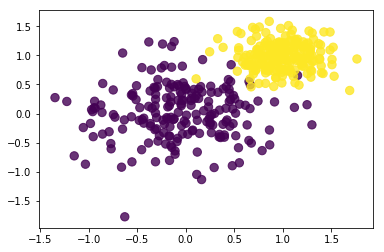

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

Mean : 2
Std : 1
Mean : 10
Std : 5
Mean : 50
Std : 25
Mean : 200
Std : 100


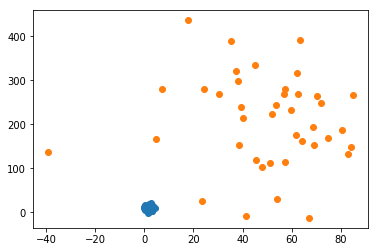

In [53]:
import numpy as np
def N_norm_dataset(n):
    np.random.seed(1234)
    size=10
    mu=np.empty(n)
    sigma=np.empty(n)
    arrays=np.empty([n,2*size,2])
    for i in range(n):
        try:
            mu[i]=float(raw_input('Mean : '))
            sigma[i]=float(raw_input('Std : '))
        except ValueError:
            print "Both must be numbers"
        subarray=sigma[i] * np.random.randn(1,2*size,2) + mu[i]
        arrays[i]=subarray
    return arrays

array0,array1,array2,array3=N_norm_dataset(4)
plt.scatter(array0,array1)
plt.scatter(array2,array3)

### 3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [55]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2019-01-06 15:09:48--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2019-01-06 15:09:49--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uccf2624e665d79a5681c0420b95.dl.dropboxusercontent.com/cd/0/inline/AY56MaF3LzIevUCnXcZMdkSR-EigeSAoNv9vaaVV3p8Pf47DrRvDKgi0FIsnfupyBGKPawurf0Nmx-M3lZ3fEmQq8hBZ6SF8SXd81HiAyNur_ekFDFUsGg9XL_wELR8OaMccot_OgsG8tmWssfK_SBWSHt82aeV9g72kfpn-2NGNiN3nWOkaRvS0PG2Gdbsr8_Q/file [segue]
--2019-01-06 15:09:49--  https://uccf2624e665d79a5681c0420b95.dl.dropboxusercontent.com/cd/0/inline/AY56MaF

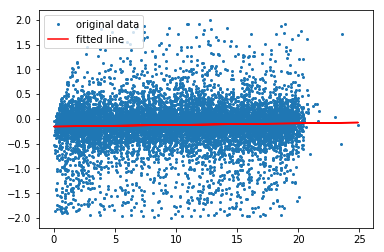

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
import seaborn as sns
from scipy import stats
# The load command takes a file.npy as input. 
# It is characterized by a high data reading efficiency. 
# Returns an array of the numpy library. 
# step00=np.load("residuals_261.npy") is an numpy array.
step0=pd.DataFrame(np.load("residuals_261.npy").item())
step1=step0[np.absolute(step0["residuals"])<2]
x=step1["distances"]
y= step1["residuals"]
slope, intercept,_, p_value0,_ = stats.linregress(x,y)
plt.plot(x, y, 'o', label='original data',markersize=2)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

### Comments
1) In the following plot I decide to merge the last three bins. In fact, considering the histogram of distances we can see that the counts reduce considerably beyond the value of 20 

2) It could be that assigning the standard deviation the standard deviation of the of the "residuals", estimated in slices (bins) of "distance" as an error is not the best choice. In fact, it is noted that errors are not significant with respect to the fluctuation of average values, being much larger. The "fishbone" is present. 

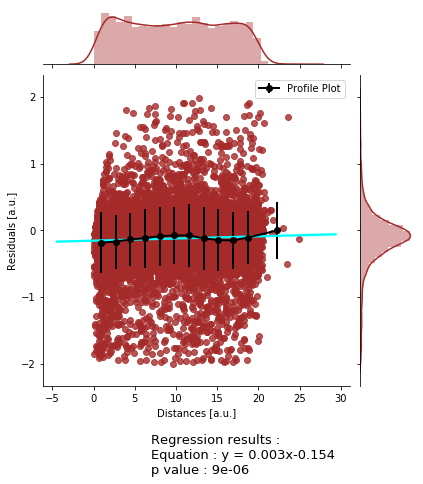

In [41]:
a=sns.jointplot(x="distances",y="residuals",data=step1,kind="reg",color="brown",joint_kws={'line_kws':{'color':'cyan'}})
eq1 = "Regression results : \n" + "Equation : y = " + str(round(slope,3)) +"x" +str(round(intercept,3)) +"\np value : "+ str(round(p_value0,6)) 
plt.text(7, -3.7, eq1, {'color': 'k', 'fontsize': 13}, va="bottom", ha="left")
# I compute the number of bins with Sturges' formula
bins=int(round(math.log(step1.shape[0],2)+1,0))
steps=(step1["distances"].max()-(step1["distances"].min()))/bins
temp=0
binedges=np.empty(bins+1)
for i in range(bins+1):
    binedges[i]=temp
    temp +=steps 
binedges =np.delete(binedges,[12,13],0)
bins=bins-2
centralbins=(binedges[1:]+binedges[:-1])/2
y=np.array([step1.loc[(step1['distances'] >=binedges[i]) & (step1['distances'] <binedges[i+1])]['residuals'].mean() for i in range(bins)])
erry=np.array([step1.loc[(step1['distances'] >=binedges[i]) & (step1['distances'] <binedges[i+1])]['residuals'].std() for i in range(bins)])
plt.errorbar(centralbins,y,yerr=erry, label='Profile Plot',linewidth=2,color='k',marker='o')
plt.xlabel('Distances [a.u.]')
plt.ylabel('Residuals [a.u.]')
a.ax_joint.legend()

### N.B.
The p-value refers to the correspondence between the fit and the entire dataset, not between the fit and the points corresponding to the average value in the sundry bins.

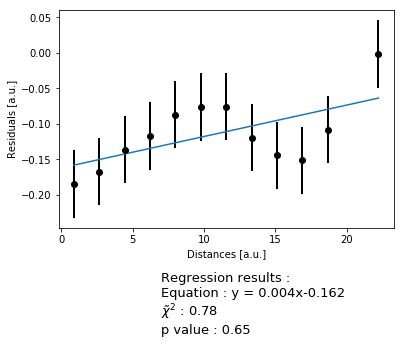

In [55]:
from scipy.optimize import curve_fit
from scipy.stats import chi2
def linear(x, a, b):
    return a*x + b
errors=[y.std() for i in range(len(y))]
plt.errorbar(centralbins,y,yerr=y.std(), label='Profile Plot',linewidth=2,color='k',marker='o', linestyle='None')
popt, pcov= curve_fit(linear, centralbins, y, sigma=errors)
chi_squared = np.sum(((linear(centralbins, *popt)-y)/y.std())**2)
reduced_chi_squared = (chi_squared)/(len(y)-len(popt))
df= len(y)-len(popt)
a, b = popt
plt.plot(centralbins, linear(centralbins, *popt), '-')
plt.xlabel('Distances [a.u.]')
plt.ylabel('Residuals [a.u.]')
eq1 = "Regression results : \n" + "Equation : y = " + str(round(a,3)) +"x" +str(round(b,3)) + "\n$\\tilde{\chi}^2$ : "+ str(("%.2f" %reduced_chi_squared))+ "\np value : "+str(round(p_value1,2))
plt.text(7,-0.40, eq1, {'color': 'k', 'fontsize': 13}, va="bottom", ha="left")
plt.show()

### Comment
Note the zoom change on the ordinate axis. The size of errors has changed considerably and in this case it can be considered significant compared to the fluctuation of average values.